In [15]:
import numpy as np
import matplotlib.pyplot as plt
from spec_id import Gen_spec, Get_flux, Specz_fit_2, Stack_posteriors,Median_w_Error_cont

import pandas as pd
from glob import glob
from scipy.interpolate import interp1d
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [2]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')

metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

In [4]:
speclist = glob('../data/*1D.fits')

In [15]:
%matplotlib inline

for i in range(len(speclist[:-1])):
    wv,fl,er = Get_flux(speclist[i])
    np.save('../data/prop_zspec_%s' % str(i+1),[wv[fl>0],fl[fl>0],er[fl>0]])
#     plt.figure(figsize=[8,8])
#     plt.plot(wv,fl)
#     plt.plot(wv,er)
#     plt.title(speclist[i])
    

In [6]:
onespec = np.load('../data/one_orbit_stack.npy')
twospec = np.load('../data/two_orbit_stack.npy')
fourspec = np.load('../data/four_orbit_stack.npy')
spec = Gen_spec(galDB['gids'][61], galDB['hi_res_specz'][61],delayed=True,maxwv=11400)


No TEAL-based tasks available for this package!
../data/galaxy_flts/n21156_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n21156_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n21156_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n21156_flt: save ../data/galaxy_flts/n21156_flt.detect_seg.fits, ../data/galaxy_flts/n21156_flt.detect.cat


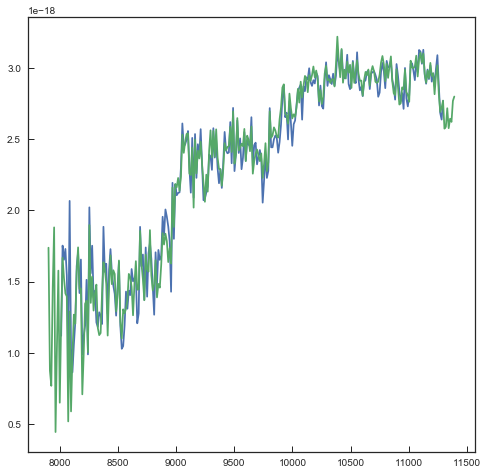

In [7]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.plot(fourspec[0],fourspec[1])
plt.plot(spec.gal_wv, spec.gal_fl)

In [3]:
mini_metal=np.arange(0.005,0.031,0.005)
mini_age=np.arange(.5,6.1,.5)
rshift = np.arange(1.,1.5,.001)

In [4]:
specs = ['../data/prop_zspec_1.npy','../data/prop_zspec_2.npy','../data/prop_zspec_3.npy','../data/prop_zspec_4.npy',
         '../data/prop_zspec_5.npy','../data/prop_zspec_6.npy','../data/prop_zspec_7.npy']
names = ['prop_pz_1','prop_pz_2','prop_pz_3','prop_pz_4','prop_pz_5','prop_pz_6','prop_pz_7']

In [5]:
for i in range(len(specs)):
    Specz_fit_2(specs[i],mini_metal,mini_age,rshift,names[i])

The following tasks in the stwcs.gui package can be run with TEAL:
     apply_headerlet          archive_headerlet          attach_headerlet     
     delete_headerlet         extract_headerlet         headerlet_summary     
    restore_headerlet             updatewcs              write_headerlet


../data/galaxy_flts/n21156_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n21156_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n21156_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n21156_flt: save ../data/galaxy_flts/n21156_flt.detect_seg.fits, ../data/galaxy_flts/n21156_flt.detect.cat


/Users/Vince.ec/anaconda2/envs/astroconda/lib/python2.7/site-packages/grizli/model.py:496: RuntimeWarning: invalid value encountered in divide
  self.optimal_profile = m/m.sum(axis=0)


Best fit specz is 1.259
Done!
../data/galaxy_flts/n21156_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n21156_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n21156_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n21156_flt: save ../data/galaxy_flts/n21156_flt.detect_seg.fits, ../data/galaxy_flts/n21156_flt.detect.cat
Best fit specz is 1.258
Done!
../data/galaxy_flts/n21156_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n21156_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n21156_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n21156_flt:

In [10]:
z,PZ1 = np.load('../rshift_dat/one_stack_Pofz.npy')
z,PZ2 = np.load('../rshift_dat/two_stack_Pofz.npy')
z,PZ4 = np.load('../rshift_dat/four_stack_Pofz.npy')
z,PZ6 = np.load('../rshift_dat/six_stack_Pofz.npy')
PZp,zp = np.loadtxt('../Pofz/n21156_pofz.dat', skiprows=1).T
PZp =np.exp(-PZp/2)/np.trapz(np.exp(-PZp/2),zp)

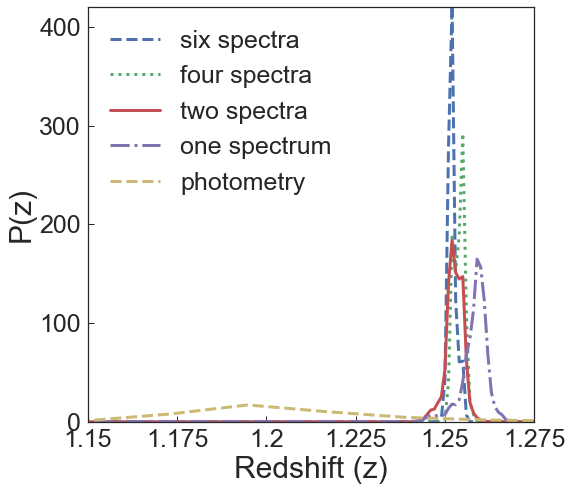

In [30]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.plot(z,PZ6,'--',label = 'six spectra', linewidth=3)
plt.plot(z,PZ4,':',label = 'four spectra', linewidth=3)
plt.plot(z,PZ2,label = 'two spectra', linewidth=3)
plt.plot(z,PZ1,'-.',label = 'one spectrum', linewidth=3)
plt.plot(zp,PZp,'--',label = 'photometry', linewidth=3)
plt.xlim(1.15,1.27)
plt.xticks([1.15,1.175,1.2,1.225,1.25,1.275],[1.15,1.175,1.2,1.225,1.25,1.275])
plt.ylim(0,420)
plt.xlabel('Redshift (z)',fontsize=30)
plt.ylabel('P(z)',fontsize=30)
plt.legend(fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.gcf().subplots_adjust(bottom=0.16)
plt.savefig('../plots/proposal_rshift.pdf',bbox_inches = 'tight')


In [6]:
z,PZ1 = np.load('../rshift_dat/prop_pz_1_Pofz.npy')
z,PZ2 = np.load('../rshift_dat/prop_pz_2_Pofz.npy')
z,PZ3 = np.load('../rshift_dat/prop_pz_3_Pofz.npy')
z,PZ4 = np.load('../rshift_dat/prop_pz_4_Pofz.npy')
z,PZ5 = np.load('../rshift_dat/prop_pz_5_Pofz.npy')
z,PZ6 = np.load('../rshift_dat/prop_pz_6_Pofz.npy')
z,PZ7 = np.load('../rshift_dat/prop_pz_7_Pofz.npy')

(1.2, 1.3)

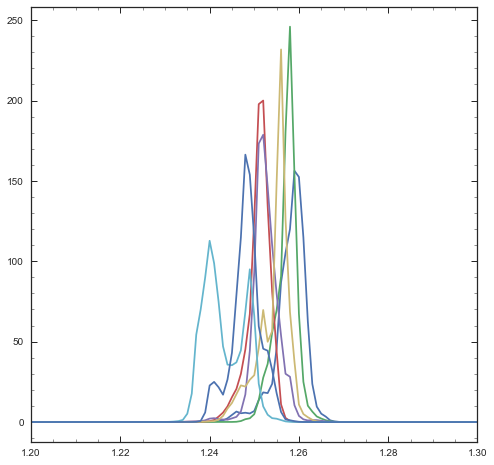

In [8]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.plot(z,PZ1)
plt.plot(z,PZ2)
plt.plot(z,PZ3)
plt.plot(z,PZ4)
plt.plot(z,PZ5)
plt.plot(z,PZ6)
plt.plot(z,PZ7)
plt.xlim(1.2,1.3)

In [10]:
Pall= np.array([PZ1,PZ2,PZ3,PZ4,PZ5,PZ6,PZ7])

In [11]:
Pstack = Stack_posteriors(Pall,z)
Psum = PZ1+PZ2+PZ3+PZ4+PZ5+PZ6+PZ7

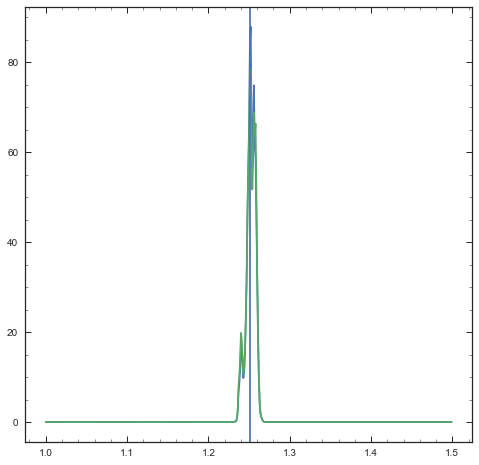

In [14]:
plt.figure(figsize=[8,8])
plt.plot(z,Pstack)
plt.plot(z,Psum/7)
plt.axvline(1.251)

In [16]:
Median_w_Error_cont(Pstack,z)

(1.2529999999999721361, 0.0049999999999994493294, 0.0049999999999994493294)